### Запустим обучение

**Для того, чтобы первая ячейка сработала, нужно перезапустить ядро Jupyter Notebook!**

---

Если мы на новом ядре запустим `import main.py`, все команды из этого файла последовательно выполнятся.

Эта схема используется для того, чтобы не приходилось обучение оборачивать в класс.

In [1]:
import torch
import main

/home/pavel/PycharmProjects/titanic-kaggle/data_functions.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restored_ages_vector[index] = restored_ages[pasid]
  0%|          | 0/1000 [00:00<?, ?it/s]/home/pavel/.local/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/home/pavel/.local/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Pl

Average loss: 0.598503, Train accuracy: 0.697007, Val accuracy: 0.725490


### Нарисуем графики, отображающие величину loss функции и точности во времени (в зависимости от эпохи)

---


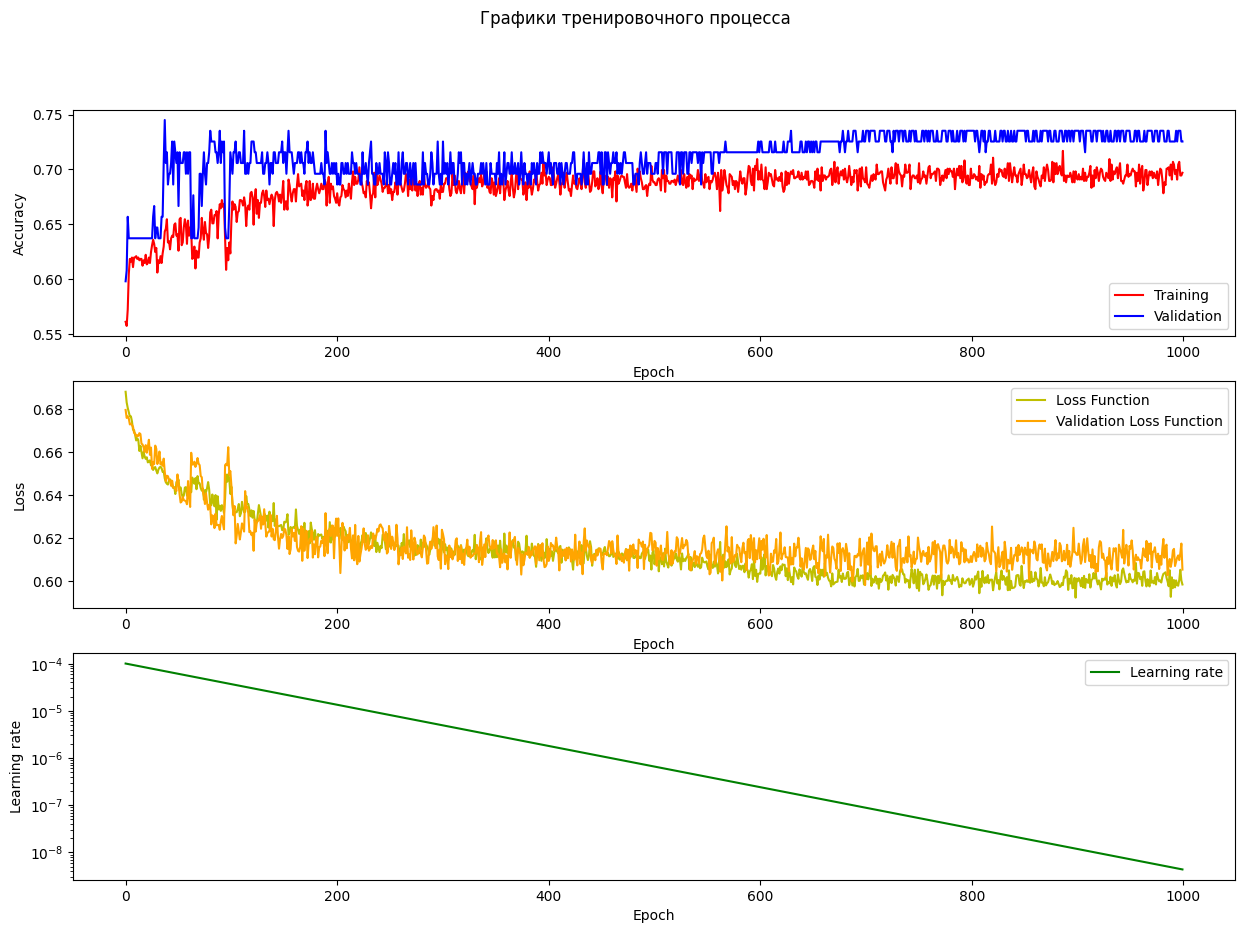

In [2]:
import matplotlib.pyplot as plt

X = list(range(main.num_epochs))

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Графики тренировочного процесса')
fig.set_figwidth(15)
fig.set_figheight(10)

ax1.plot(X, main.train_history, color='r', label='Training')
ax1.plot(X, main.val_history, color='b', label='Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(X, main.loss_history, color='y', label='Loss Function')
ax2.plot(X, list(map(float, main.val_loss_history)), color='orange', label='Validation Loss Function')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

ax3.semilogy(X, main.lr_history, color='g', label='Learning rate')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Learning rate')
ax3.legend()

### Сохраним веса

---

In [3]:
import os
import datetime
torch.save(
        main.nn_model.state_dict(),
        os.path.join('optimized/optim'+datetime.datetime.now().strftime('%d%m%y%H%M')+'.pth')
    )

Выведем решение для Kaggle

In [3]:
import torch
import os
import datetime
import pandas as pd
from data_functions import *
from torch.utils.data import DataLoader

test_set = TitanicDataset('test.csv', test=True)
test_loader = DataLoader(test_set, batch_size=1)

predictions = []
labels = {}

for i_step, (x, y) in enumerate(test_loader):
    x = x.to(main.device)
    main.nn_model.eval()
    prediction = main.nn_model(x)
    #print(int(x[0][0]))
    predictions.append(torch.argmax(prediction, dim=1))
    labels[int(x[0][0])] = int(torch.argmax(prediction, dim=1))


output = pd.DataFrame(labels.items(), columns = ['PassengerId', 'Survived'])
output.to_csv(os.path.join('outputs/output'+datetime.datetime.now().strftime('%d%m%y%H%M')+'.csv'), index=False)
output

/home/pavel/PycharmProjects/titanic-kaggle/data_functions.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restored_ages_vector[index] = restored_ages[pasid]
/home/pavel/.local/lib/python3.10/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
